In [1]:
%load_ext autoreload
%autoreload 2

import copy
import os.path as osp
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel

sys.path.append('../src')
from eval_utils import calc_ap_score, compare_results, load_preds

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
eps = np.finfo("float").eps

plt.style.use(["science", "ieee"])
out_path = osp.join("../outputs/figures")

In [2]:
# Load data
dataset_mapping = {
    "pinterest": "Pinterest",
    "movielens": "MovieLens",
    "Clothing_Shoes_and_Jewelry": "Clothing",
    "Toys_and_Games": "Toys",
}

preds_dict = {}
for dataset_name, print_name in dataset_mapping.items():
    print(dataset_name)
    preds_dict[print_name] = load_preds(
        osp.join(f"../outputs/{dataset_name}/results.yaml")
    )
label_ratios = np.arange(0.1, 1.1, 0.1)


pinterest
label_ratio_0.1_no_cf label_ratio_0.1_with_cf [0.091 0.146 59.770%]. size=(8119, 32)
label_ratio_0.2_no_cf label_ratio_0.2_with_cf [0.117 0.169 44.477%]. size=(8119, 32)
label_ratio_0.3_no_cf label_ratio_0.3_with_cf [0.270 0.308 14.210%]. size=(8119, 32)
label_ratio_0.4_no_cf label_ratio_0.4_with_cf [0.294 0.326 11.051%]. size=(8119, 32)
label_ratio_0.5_no_cf label_ratio_0.5_with_cf [0.316 0.338 6.841%]. size=(8119, 32)
label_ratio_0.6_no_cf label_ratio_0.6_with_cf [0.329 0.344 4.460%]. size=(8119, 32)
label_ratio_0.7_no_cf label_ratio_0.7_with_cf [0.331 0.341 3.081%]. size=(8119, 32)
label_ratio_0.8_no_cf label_ratio_0.8_with_cf [0.333 0.350 5.080%]. size=(8119, 32)
label_ratio_0.9_no_cf label_ratio_0.9_with_cf [0.334 0.351 5.186%]. size=(8119, 32)
label_ratio_1.0_no_cf label_ratio_1.0_with_cf [0.338 0.355 5.123%]. size=(8119, 32)
movielens
label_ratio_0.1_no_cf label_ratio_0.1_with_cf [0.263 0.269 2.066%]. size=(3183, 19)
label_ratio_0.2_no_cf label_ratio_0.2_with_cf [0.274

# Plot performance

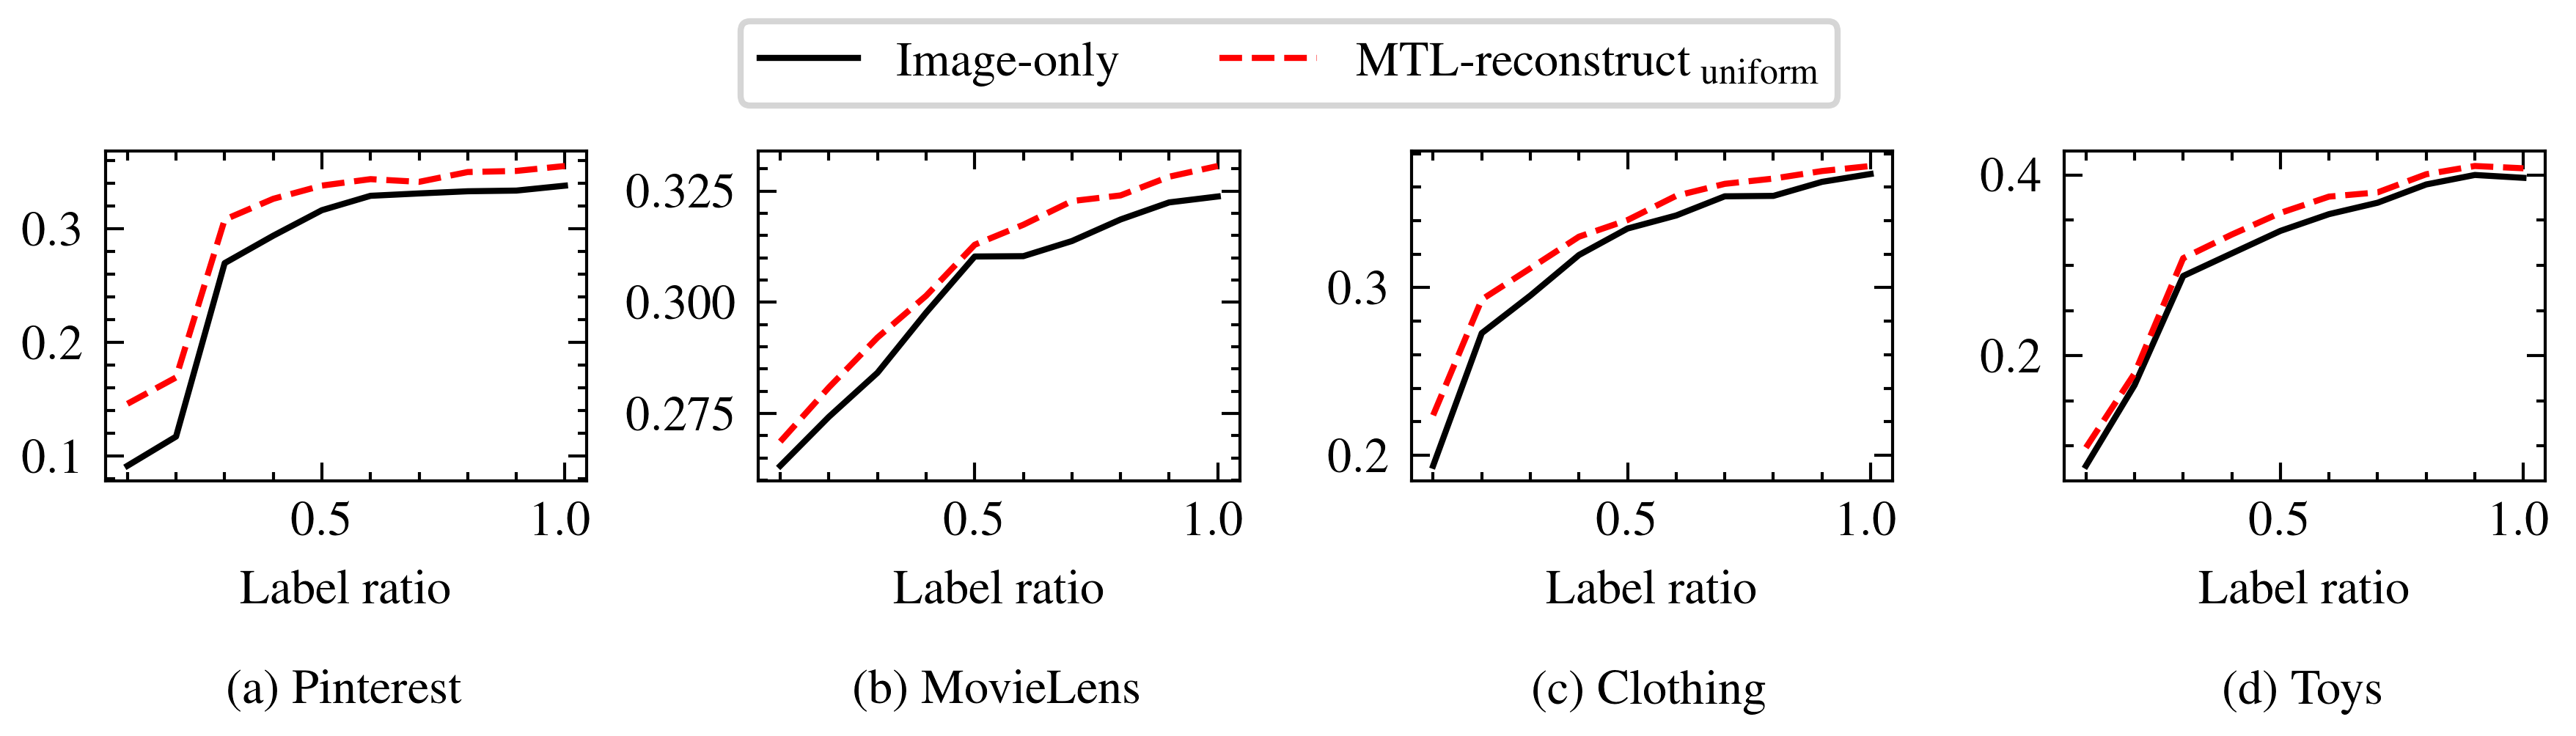

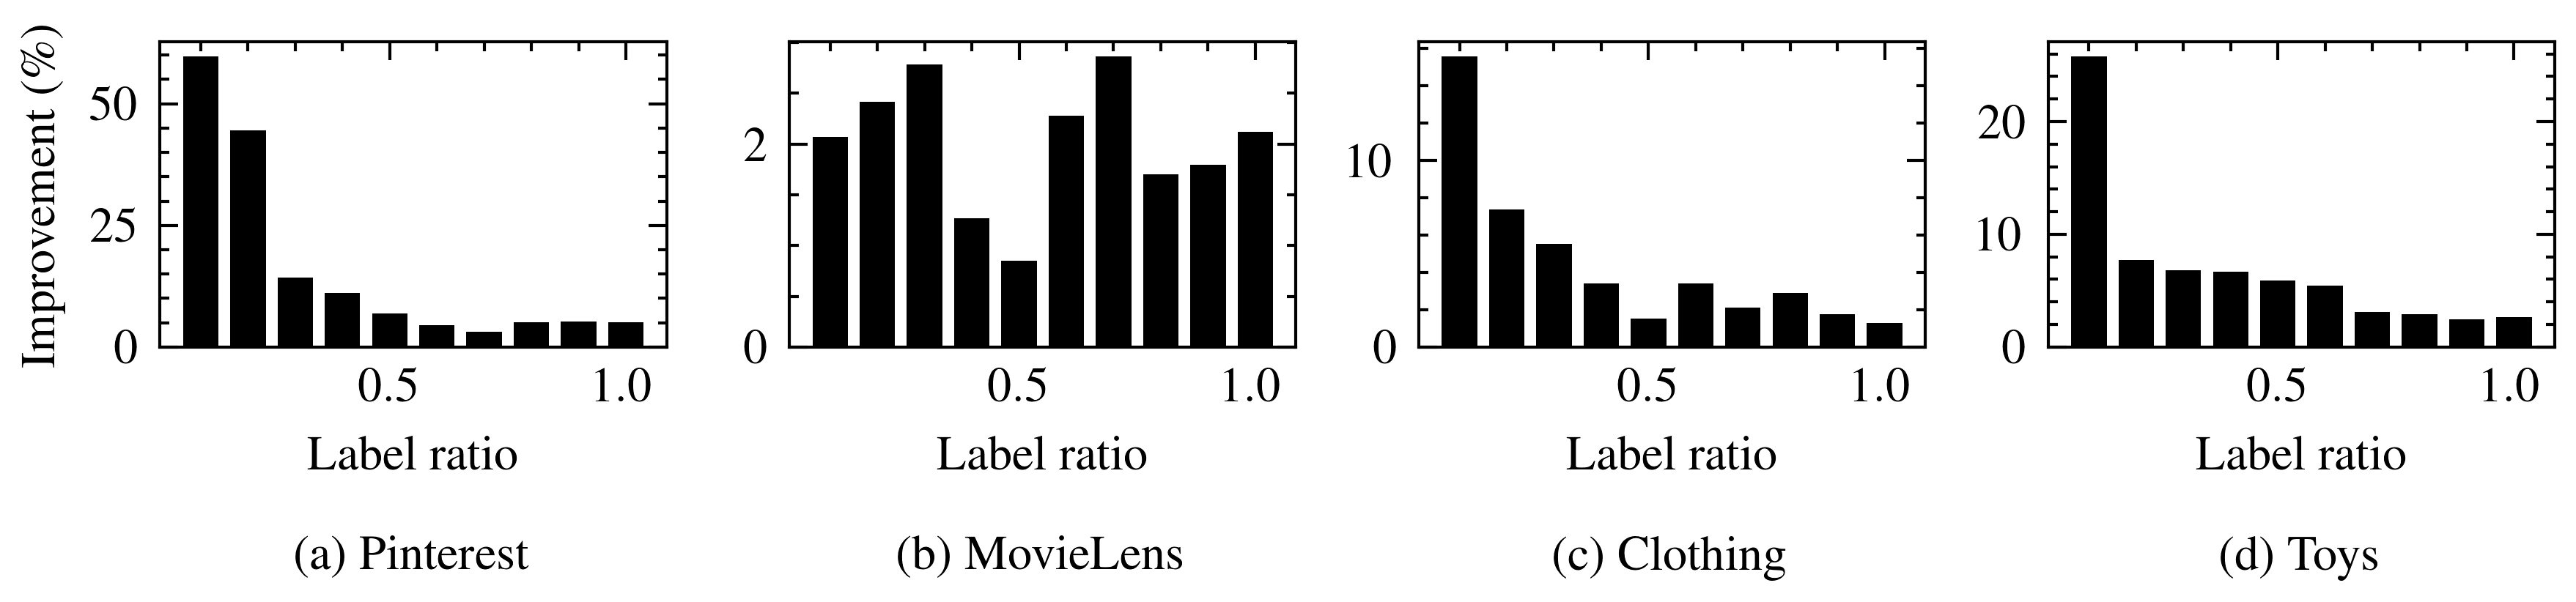

In [3]:
fig, axs = plt.subplots(1, 4, figsize=(6, 1.75))
for k, (dataset_name, performance_dict) in enumerate(preds_dict.items()):
    ax = axs[k]
    ax.plot(label_ratios, performance_dict["no_cf_ap"], label="Image-only")
    ax.plot(
        label_ratios,
        performance_dict["with_cf_ap"],
        label=r"$\text{MTL-reconstruct}_\text{\ uniform}$",
    )
    ax.set_xlabel("Label ratio \n\n ({}) {}".format(chr(k + 97), dataset_name))

plt.tight_layout()

# legend
fig.subplots_adjust(top=0.8)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(
    handles, labels, loc="upper center", ncol=2, frameon=True, bbox_to_anchor=[0.5, 1.0]
)

plt.savefig(osp.join(out_path, "ap.pdf"))
plt.show()

fig, axs = plt.subplots(1, 4, figsize=(6, 1.5))
for k, (dataset_name, performance_dict) in enumerate(preds_dict.items()):

    improvement = (
        100 * performance_dict["with_cf_ap"] / performance_dict["no_cf_ap"] - 100
    )

    ax = axs[k]
    ax.bar(label_ratios, improvement, width=0.075)
    ax.set_xlabel("Label ratio \n\n ({}) {}".format(chr(k + 97), dataset_name))
    ax.set_ylim(bottom=0.0)
axs[0].set_ylabel("Improvement (\%)")
plt.tight_layout()
plt.savefig(osp.join(out_path, "ap_improvement.pdf"))
plt.show()


# Table

In [4]:
metric_res_dicts = {}

# metric -> dataset -> performance dataframe
single_metric_res_dict = {}
single_metric_res_dict = compare_results(
    preds_dict, calc_ap_score, single_metric_res_dict
)


Pinterest


100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


MovieLens


100%|██████████| 10/10 [00:02<00:00,  3.91it/s]


Clothing


100%|██████████| 10/10 [00:48<00:00,  4.83s/it]


Toys


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


In [5]:
latex_dict = {}

preds_dict_cpy = copy.deepcopy(preds_dict)
for dataset_name, method_dict in preds_dict_cpy.items():

    image_only_pred = method_dict.pop("Image-only")
    labels = method_dict.pop("labels")

    ap_baseline = calc_ap_score(labels, image_only_pred)
    ap_baseline_mean = np.mean(ap_baseline)

    for method_name, method_pred in method_dict.items():
        ap = calc_ap_score(labels, method_pred)
        ap_pvalue = ttest_rel(ap_baseline, ap).pvalue.round(3)
        ap = np.mean(ap).round(3)
        ap_ratio = np.round(100 * (ap / ap_baseline_mean - 1.0), 1)
        ap_astrix = ""
        if ap_pvalue <= 0.05:
            ap_astrix = "*"
        if ap_pvalue <= 0.01:
            ap_astrix = "**"

        print(f"{method_name}")
        print(
            f'\t ap = {ap } ({"+" if ap_ratio>=0 else ""}{ap_ratio}%{ap_astrix}) \t {ap_pvalue=}'
        )

    print()
    print()


KeyError: 'Image-only'

In [7]:
preds_dict_cpy['Pinterest'].keys()

dict_keys(['no_cf_preds', 'with_cf_preds', 'labels', 'no_cf_ap', 'with_cf_ap'])

In [ ]:
['Image-only',
'Fine-tuning',
'Contrastive-loss',
'MTL-reconstruct_uniform',
'MTL-reconstruct_interaction',
'MTL-reconstruct_loss']